# Module - 6

Voting Classifier

In [1]:
#import library packages
import pandas as p

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Load given dataset
data = p.read_csv("WSN_Dataset.csv")

In [4]:
df = data.drop_duplicates()

In [5]:
df

,id,Time,Is_CH,who_CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned_Energy,Attack_type
0,0,50,1,101000,0.00000,1,0,0,25,1,0,0,0,1200,48,130.08535,0,2.46940,Normal
1,1,50,0,101044,75.32345,0,4,1,0,0,1,2,38,0,0,0.00000,4,0.06957,Normal
2,2,50,0,101010,46.95453,0,4,1,0,0,1,19,41,0,0,0.00000,3,0.06898,Normal
3,3,50,0,101044,64.85231,0,4,1,0,0,1,16,38,0,0,0.00000,4,0.06673,Normal
4,4,50,0,101010,4.83341,0,4,1,0,0,1,25,41,0,0,0.00000,3,0.06534,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50381,373986,703,1,114021,0.00000,1,6,0,26,1,0,0,0,1196,0,0.00000,0,0.00720,Blackhole
50382,374130,753,1,115065,0.00000,1,4,0,55,1,0,0,0,1320,0,0.00000,0,0.00722,Blackhole
50383,374270,853,1,117005,0.00000,1,10,0,14,1,0,0,0,745,0,0.00000,0,0.00721,Blackhole
50384,374342,853,1,117078,0.00000,1,10,0,11,1,0,0,0,921,0,0.00000,0,0.00726,Blackhole


In [6]:
del df['id']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50386 entries, 0 to 50385
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Time             50386 non-null  int64  
 1   Is_CH            50386 non-null  int64  
 2   who_CH           50386 non-null  int64  
 3   Dist_To_CH       50386 non-null  float64
 4   ADV_S            50386 non-null  int64  
 5   ADV_R            50386 non-null  int64  
 6   JOIN_S           50386 non-null  int64  
 7   JOIN_R           50386 non-null  int64  
 8   SCH_S            50386 non-null  int64  
 9   SCH_R            50386 non-null  int64  
 10  Rank             50386 non-null  int64  
 11  DATA_S           50386 non-null  int64  
 12  DATA_R           50386 non-null  int64  
 13  Data_Sent_To_BS  50386 non-null  int64  
 14  dist_CH_To_BS    50386 non-null  float64
 15  send_code        50386 non-null  int64  
 16  Expaned_Energy   50386 non-null  float64
 17  Attack_type 

In [8]:
df['Attack_type'].unique()

array(['Normal', 'Flooding', 'TDMA', 'Grayhole', 'Blackhole'],
      dtype=object)

In [9]:
from sklearn.preprocessing import LabelEncoder
col = ['Attack_type']
label = LabelEncoder()
for i in col:
    df[i] = label.fit_transform(df[i]).astype(int)

In [10]:
df['Attack_type'].unique()

array([3, 1, 4, 2, 0])

In [11]:
df

,Time,Is_CH,who_CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned_Energy,Attack_type
0,50,1,101000,0.00000,1,0,0,25,1,0,0,0,1200,48,130.08535,0,2.46940,3
1,50,0,101044,75.32345,0,4,1,0,0,1,2,38,0,0,0.00000,4,0.06957,3
2,50,0,101010,46.95453,0,4,1,0,0,1,19,41,0,0,0.00000,3,0.06898,3
3,50,0,101044,64.85231,0,4,1,0,0,1,16,38,0,0,0.00000,4,0.06673,3
4,50,0,101010,4.83341,0,4,1,0,0,1,25,41,0,0,0.00000,3,0.06534,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50381,703,1,114021,0.00000,1,6,0,26,1,0,0,0,1196,0,0.00000,0,0.00720,0
50382,753,1,115065,0.00000,1,4,0,55,1,0,0,0,1320,0,0.00000,0,0.00722,0
50383,853,1,117005,0.00000,1,10,0,14,1,0,0,0,745,0,0.00000,0,0.00721,0
50384,853,1,117078,0.00000,1,10,0,11,1,0,0,0,921,0,0.00000,0,0.00726,0


In [12]:
inputs = df.drop(labels='Attack_type', axis=1)
output = df.loc[:,'Attack_type']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs, output, test_size=0.3, random_state=1, stratify=output)
print("Number of Training Dataset: ", len(X_train))
print("Number of Testing Dataset: ", len(X_test))
print("Total Number of Dataset: ", len(X_train)+len(X_test))

Number of Training Dataset:  35270
Number of Testing Dataset:  15116
Total Number of Dataset:  50386


Voting Classifier

In [14]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, plot_confusion_matrix

In [15]:
gnb = GaussianNB()
abc = AdaBoostClassifier()
knn = KNeighborsClassifier()

In [16]:
vot_clf = VotingClassifier(estimators=[('GaussianNB', gnb), ('AdaBoostClassifier', abc), ('KNeighborsClassifier', knn)], voting='hard')

Training Process

In [17]:
vot_clf.fit(X_train, y_train)
pred_vtng = vot_clf.predict(X_test)

Getting Accuracy

In [18]:
accuracy = accuracy_score(y_test,pred_vtng)
print('Accuracy of Voting Classifier is: ',accuracy*100)

Accuracy of Voting Classifier is:  94.48266737232072


Finding Clasiification Report

In [19]:
cr = classification_report(y_test,pred_vtng)
print('Classification report\n---------------------\n',cr)

Classification report
---------------------
               precision    recall  f1-score   support

           0       0.94      0.97      0.96      3015
           1       0.81      0.97      0.88       994
           2       0.93      0.97      0.95      4379
           3       0.97      0.95      0.96      4737
           4       0.99      0.84      0.91      1991

    accuracy                           0.94     15116
   macro avg       0.93      0.94      0.93     15116
weighted avg       0.95      0.94      0.94     15116



Finding Confusion Matrix

In [20]:
cm = confusion_matrix(y_test,pred_vtng)
print('Confusion matrix\n----------------\n',cm)

Confusion matrix
----------------
 [[2914    0  101    0    0]
 [   9  966   19    0    0]
 [  64   65 4228   11   11]
 [  10  107  112 4502    6]
 [  90   52   66  111 1672]]


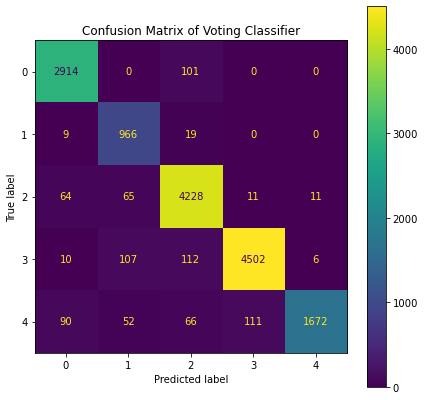

In [21]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(7,7))
plot_confusion_matrix(vot_clf, X_test, y_test, ax=ax)
plt.title('Confusion Matrix of Voting Classifier')
plt.show()

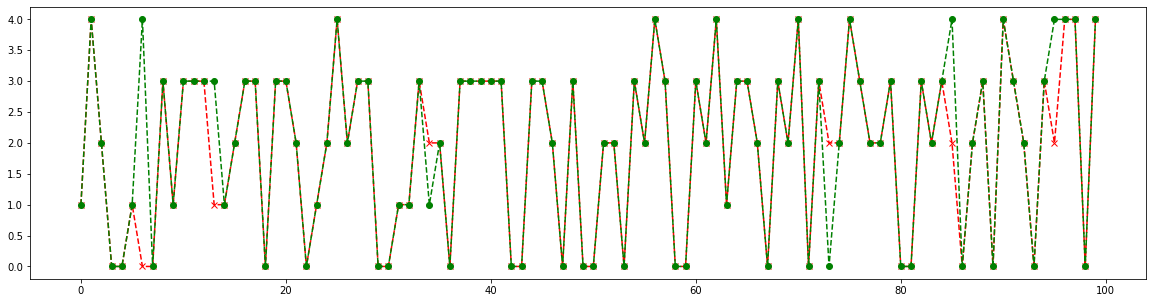

In [22]:
DF = p.DataFrame()
DF["y_test"] = y_test
DF["predicted"] = pred_vtng
DF.reset_index(inplace=True)
plt.figure(figsize=(20, 5))
plt.plot(DF["predicted"][:100], marker='x', linestyle='dashed', color='red')
plt.plot(DF["y_test"][:100],  marker='o', linestyle='dashed', color='green')
plt.show()

Saving Model

In [23]:
import joblib
joblib.dump(vot_clf,'VC.pkl')

['VC.pkl']